In [53]:
import numpy as np
from matplotlib import pylab as plt

%matplotlib inline

In [44]:
class KMeans:
    
    def __init__(self, k):
        self._k = k
    
    def l2Distance(self, a, b):
        return np.sqrt(np.sum(np.square(a - b)))
    
    def initCentroids(self, X):
        return X[np.random.permutation(X.shape[0])][:self._k]
    
    def cluster(self, X):
        m, n = X.shape
        Xcluster = np.zeros((m, 2))
        centroids = self.initCentroids(X)
        clusterChanged = True
        
        while clusterChanged:
            clusterChanged = False
            
            for i in range(m):
                x = X[i]
                
                minDistance = float('inf')
                minCentroidsIndex = -1
                
                for j in range(self._k):
                    c = centroids[j]
                    distance = self.l2Distance(x, c)
                    
                    if distance < minDistance:
                        minDistance = distance
                        minCentroidsIndex = j
                        
                if Xcluster[i, 0] != minCentroidsIndex:
                    clusterChanged = True

                Xcluster[i, 0] = minCentroidsIndex
                Xcluster[i, 1] = minDistance
                
            for i in range(self._k):
                mean = np.mean(X[Xcluster[:, 0] == i], axis=0)
                centroids[i] = mean
                
        self._Xcluster = Xcluster
        self._centroids = centroids
                
    def fit(self, X):
        self.cluster(X)

In [45]:
def loadDataset(path):
    X = []
    with open(path) as f:
        for line in f:
            parts = line.strip().split('\t')
            parts = [float(part) for part in parts]
            X.append(parts)
            
    return np.array(X)

In [46]:
X = loadDataset('testSet.txt')
X.shape

(80, 2)

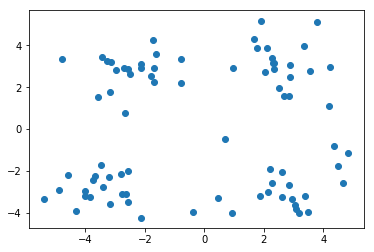

In [54]:
plt.scatter(X[:, 0], X[:, 1])

In [63]:
kmeans = KMeans(4)
kmeans.fit(X)

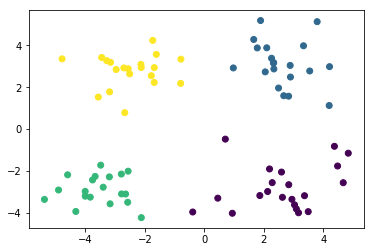

In [64]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans._Xcluster[:, 0])